In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Read in the data
df = pd.read_csv("dataset.csv", header=None)
print("Shape = ",df.shape)
df.head()

Shape =  (300, 3)


,0,1,2
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [3]:
#Remove anomalies
ori_len = len(df)
z_scores = scipy.stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1) # Remove the anomalies that have a large Z-score
df = df[filtered_entries]
new_len = len(df)
print('Removed ',ori_len-new_len, 'anomalies.')

Removed  2 anomalies.


In [4]:
#Add first column of 1 for the bias term.
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,0,1,2
0,1,0.490,-0.18,11.50
1,1,-1.410,-1.23,11.80
2,1,0.943,4.51,-3.24
3,1,3.570,5.07,-23.90
4,1,-1.700,6.91,-22.10


In [5]:
#Allocate variables
X = df.drop(columns=2)
y = df.iloc[:, 3]

In [6]:
#Feature scaling, standardization
for i in range(1, len(X.columns)):
    X[i-1] = scipy.stats.zscore(X[i-1])
    # z_scores can also calculate in the following way (without using scipy.stats). 
    # X[i-1] = (X[i-1]-np.mean(X[i-1]))/np.std(X[i-1]) 
X.head()

,00,0,1
0,1,-0.311367,-0.737698
1,1,-0.651456,-1.088457
2,1,-0.230283,0.829027
3,1,0.239934,1.016099
4,1,-0.703364,1.630762


In [7]:
# Add higher order term(s) to the hypothesis
X[2]=X[0]**2
X[3]=X[1]**2
X[4]=X[0]*X[1]
X[5]=(X[0]**2)*X[1]
X[6]=X[0]*(X[1]**2)
X.head()

,00,0,1,2,3,4,5,6
0,1,-0.311367,-0.737698,0.096950,0.544198,0.229695,-0.071520,-0.169446
1,1,-0.651456,-1.088457,0.424395,1.184739,0.709082,-0.461936,-0.771806
2,1,-0.230283,0.829027,0.053030,0.687286,-0.190911,0.043964,-0.158270
3,1,0.239934,1.016099,0.057569,1.032456,0.243797,0.058495,0.247722
4,1,-0.703364,1.630762,0.494721,2.659386,-1.147020,0.806773,-1.870517


In [8]:
#Initiating feature parameters, theta
theta = np.array([0.1]*len(X.columns))

In [9]:
#Get the number of training data
m = len(df)

In [10]:
#Define the hypothesis function
def hypothesis(theta, X):
    y=0
    for value in zip(theta,X):
        y+=value[0]*X[value[1]]

    return y

In [11]:
#Define the cost function
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    #y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*len(X))

In [12]:
#Define the function for gradient descent
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        #y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

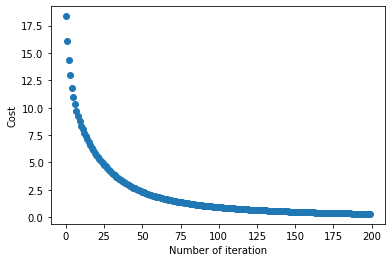

In [13]:
#Use the gradient descent method to find the cost.
alpha = 0.05 #learning rate
iterations_no = 200 #number of iteration

#Run the gradient descent
J, j, theta = gradientDescent(X, y, theta, alpha, iterations_no)

#Predict the output, y_hat, using the optimized theta
y_hat = hypothesis(theta, X)

#Check the learning rate and number of iteration are fine
plt.figure()
plt.scatter(x=list(range(0, iterations_no)), y=J)
plt.xlabel('Number of iteration')
plt.ylabel('Cost')
plt.show()

Root Mean Squared Error =  0.49417213009635386
KstestResult(statistic=0.03355704697986577, pvalue=0.9961948501419005)


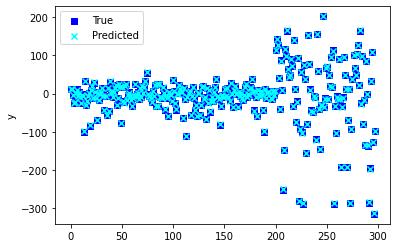

In [14]:
#Model evaluation (y vs. y_hat)
RMSE = np.sum((y-y_hat)**2)/m # Root Mean Square Error
print('Root Mean Squared Error = ',RMSE)
#K-S test and the p-value between the true and predicted values
print(scipy.stats.ks_2samp(y,y_hat))

#Plot the true and predicted values
plt.figure()
plt.scatter(x=list(range(0, m)),y= y, color='blue',marker='s')         
plt.scatter(x=list(range(0, m)), y=y_hat, color='cyan',marker='x')
plt.ylabel('y')
plt.legend(['True','Predicted'])
plt.show()

In [15]:
# Get the parameters for the features
print(theta)

[  3.27017922  -9.05112784 -15.20559825 -24.91266018   0.42448759
 -29.95630349 -37.14498043  -0.14573458]


# Column C as a function of column A and B

$C(A,B)\approx3.27-9.05A-15.21B-24.91A^{2}+0.42B^{2}-29.96AB-37.14A^{2}B-0.15AB^{2}$